In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [79]:
bank = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/bank-full.csv')

In [80]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


There are 17 columns/features (including y variable) however we only need few of them in terms to run the model. They are as below, 

### age, marital, default, balance, housing, loan, duration, campaign, pdays, previous, poutcome, y 

### Dropping the unwanted column 

In [81]:
bank.drop(bank.columns[1:2], inplace=True,axis = 1)
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
bank.drop(bank.columns[2:3], inplace=True,axis = 1)
bank.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [83]:
bank.drop(bank.columns[6:9], inplace=True,axis = 1)
bank.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,married,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,single,no,29,yes,no,151,1,-1,0,unknown,no
2,33,married,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,married,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,single,no,1,no,no,198,1,-1,0,unknown,no


In [84]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   marital   45211 non-null  object
 2   default   45211 non-null  object
 3   balance   45211 non-null  int64 
 4   housing   45211 non-null  object
 5   loan      45211 non-null  object
 6   duration  45211 non-null  int64 
 7   campaign  45211 non-null  int64 
 8   pdays     45211 non-null  int64 
 9   previous  45211 non-null  int64 
 10  poutcome  45211 non-null  object
 11  y         45211 non-null  object
dtypes: int64(6), object(6)
memory usage: 4.1+ MB


### We have 5 catogorical columns which we need to convert into numeric one by One Hot Encoding method 
     however before converting it let's first devide the data set into X & Y variables 

In [85]:
# Deviding our data into input and output variabales
X = bank.iloc[:,:11]
Y = bank.iloc[:,11]

In [86]:
X.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,married,no,2143,yes,no,261,1,-1,0,unknown
1,44,single,no,29,yes,no,151,1,-1,0,unknown
2,33,married,no,2,yes,yes,76,1,-1,0,unknown
3,47,married,no,1506,yes,no,92,1,-1,0,unknown
4,33,single,no,1,no,no,198,1,-1,0,unknown


In [87]:
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [88]:
#Creating dummy variable for marital column
X2=pd.get_dummies(X,columns=['marital'])

#Creating dummy variable for default column
X3=pd.get_dummies(X2,columns=['default'])

#Creating dummy variable for housing column
X4=pd.get_dummies(X3,columns=['housing'])

#Creating dummy variable for loan column
X5=pd.get_dummies(X4,columns=['loan'])

#Creating dummy variable for poutcome column
X6=pd.get_dummies(X5,columns=['poutcome'])

In [89]:
X6.head()

,age,balance,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,29,151,1,-1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
2,33,2,76,1,-1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
3,47,1506,92,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
4,33,1,198,1,-1,0,0,0,1,1,0,1,0,1,0,0,0,0,1


In [90]:
X6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   balance           45211 non-null  int64
 2   duration          45211 non-null  int64
 3   campaign          45211 non-null  int64
 4   pdays             45211 non-null  int64
 5   previous          45211 non-null  int64
 6   marital_divorced  45211 non-null  uint8
 7   marital_married   45211 non-null  uint8
 8   marital_single    45211 non-null  uint8
 9   default_no        45211 non-null  uint8
 10  default_yes       45211 non-null  uint8
 11  housing_no        45211 non-null  uint8
 12  housing_yes       45211 non-null  uint8
 13  loan_no           45211 non-null  uint8
 14  loan_yes          45211 non-null  uint8
 15  poutcome_failure  45211 non-null  uint8
 16  poutcome_other    45211 non-null  uint8
 17  poutcome_success  45211 non-nul

### Now let's convert the variable Y into numeric by Lable encoding method

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

In [92]:
print(Y)

[0 0 0 ... 1 0 0]


In [93]:
Y.shape

(45211,)

In [94]:
Y1 = pd.DataFrame(Y)

In [95]:
Y1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [96]:
Y1.shape

(45211, 1)

In [97]:
test_size = 0.33
seed = 7
X6_train, X6_test, Y1_train, Y1_test = train_test_split(X6, Y1, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X6_train, Y1_train)
result = model.score(X6_test, Y1_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
result*100.0

89.70509383378015

In [99]:
#Predictions
predictions = model.predict(X6_test)

In [100]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm=confusion_matrix(Y1_test, predictions)
print(cm)

# New line
print('\n')

# Classification report
print(classification_report(Y1_test,predictions))

[[12930   272]
 [ 1264   454]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     13202
           1       0.63      0.26      0.37      1718

    accuracy                           0.90     14920
   macro avg       0.77      0.62      0.66     14920
weighted avg       0.88      0.90      0.88     14920



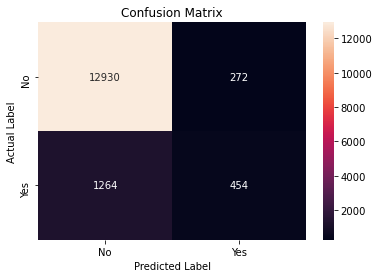

In [101]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [102]:
#ROC Curve 
model.predict_proba(X6_test)[:,1]

array([0.05268169, 0.06466936, 0.26027392, ..., 0.03790012, 0.13990286,
       0.09802888])

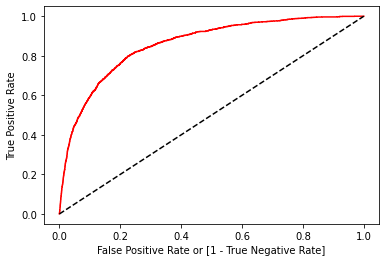

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y1_test, model.predict_proba(X6_test)[:,1])

auc = roc_auc_score(Y1_test, predictions)
auc


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [104]:
auc

0.6218289146933147